In [1]:
import numpy as np
import bisect

from matplotlib import pyplot as plt

In [2]:
from pixel3d import Pixel3D

In [3]:
from topologicalunionfind import TopologicalUnionFind

### Reading Cube

In [4]:
binary = np.fromfile('../cube/map.bin')
binary.shape

(87464,)

In [5]:
cube_shape = (26, 29, 116)

In [6]:
cube = binary.reshape(cube_shape)
cube.shape

(26, 29, 116)

### Creating Pixel Objects

In [7]:
data = cube
data.shape

(26, 29, 116)

In [8]:
mat = []
for i in range(data.shape[0]):
    aslice = []
    for j in range(data.shape[1]):
        row = []
        for k in range(data.shape[2]):
            element = data.max() - data[i][j][k]
            row.append(Pixel3D(i, j, k, element))
        aslice.append(row)
    mat.append(aslice)
len(mat), len(mat[0]), len(mat[0][0])

(26, 29, 116)

In [9]:
arr = sorted([e for aslice in mat for row in aslice for e in row if e.getV() != data.max()])
len(arr)

62448

### Getting Neighbors for a Pixel

In [10]:
def get_neighbors(pixel):
    neighbors = []
    xmin, xmax = 0, data.shape[0]-1
    ymin, ymax = 0, data.shape[1]-1
    zmin, zmax = 0, data.shape[2]-1
    x = pixel.getX()
    y = pixel.getY()
    z = pixel.getZ()
    if x > xmin and mat[x-1][y][z].getV() != data.max():
        neighbors.append(mat[x-1][y][z])
    if x < xmax and mat[x+1][y][z].getV() != data.max():
        neighbors.append(mat[x+1][y][z])
    if y > ymin and mat[x][y-1][z].getV() != data.max():
        neighbors.append(mat[x][y-1][z])
    if y < ymax and mat[x][y+1][z].getV() != data.max():
        neighbors.append(mat[x][y+1][z])
    if z > zmin and mat[x][y][z-1].getV() != data.max():
        neighbors.append(mat[x][y][z-1])
    if z < zmax and mat[x][y][z+1].getV() != data.max():
        neighbors.append(mat[x][y][z+1])
    return neighbors

In [11]:
set([len(get_neighbors(pixel)) for pixel in arr])

{1, 2, 3, 4, 5, 6}

### Creating Topological Union-find

In [12]:
tuf = TopologicalUnionFind()
tuf

<UnionFind:
	elts=[],
	siz=[],
	par=[],
n_elts=0,n_comps=0>

In [13]:
for pixel in arr:
    tuf.add(pixel, pixel.getV())
    for neighbor in get_neighbors(pixel):
        tuf.union(pixel, neighbor, pixel.getV())

In [15]:
pd = tuf.persistence_diagram()
len(pd)

6551

In [17]:
y = np.arange(1, len(pd))
xmin = [f[1] for f in pd]
xmax = [10 if np.isinf(f[2]) else f[2] for f in pd]

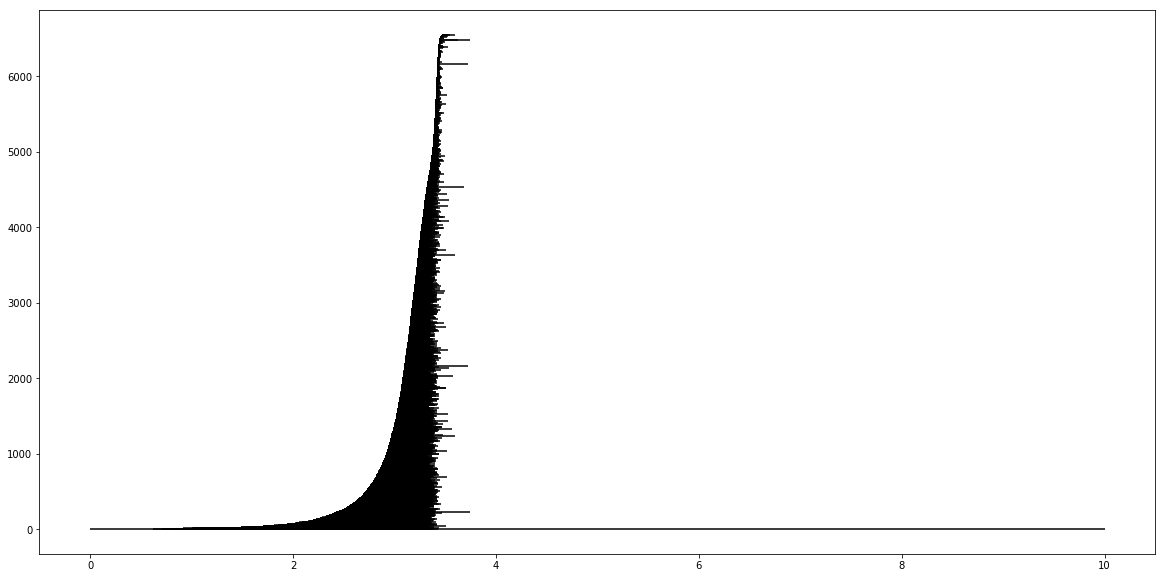

In [18]:
plt.figure(figsize=(20,10))
plt.hlines(y=y, xmin=xmin, xmax=xmax)
plt.show()

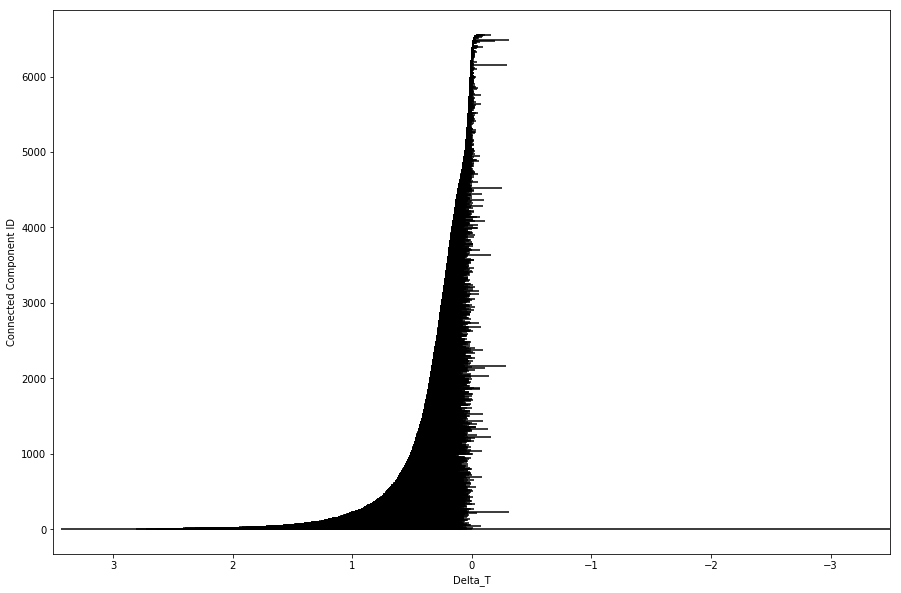

In [28]:
plt.figure(figsize=(15,10))
plt.hlines(y=y, xmin=[data.max() - x for x in xmin], xmax=[data.max() - x for x in xmax])
plt.xlim(3.5,-3.5)
plt.xlabel('Delta_T')
plt.ylabel('Connected Component ID')
plt.show()